In [5]:
import os, shutil

In [6]:
original_dataset_dir = './datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/cats_and_dogs_small'

In [7]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
valiadation_dir =  os.path.join(base_dir,'validation')
os.mkdir(valiadation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/cats_and_dogs_small\\train'

In [8]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

valiadation_cats_dir = os.path.join(valiadation_dir,'cats')
os.mkdir(valiadation_cats_dir)

valiadation_dogs_dir = os.path.join(valiadation_dir,'dogs')
os.mkdir(valiadation_dogs_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/cats_and_dogs_small\\train\\cats'

In [5]:

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(valiadation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(valiadation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
validation_dir =  os.path.join(base_dir,'validation')
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:',data_batch.shape)
    print('배치 레이블 크기:',labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 296152735166819916
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17562750293473525624
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10432934642721170962
physical_device_desc: "device: XLA_GPU device"
]


In [12]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 620ms/step - loss: 0.6873 - acc: 0.5600 - val_loss: 0.6763 - val_acc: 0.5210
Epoch 2/30
100/100 [==============================] - 72s 716ms/step - loss: 0.6447 - acc: 0.6300 - val_loss: 0.6304 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 69s 694ms/step - loss: 0.6006 - acc: 0.6800 - val_loss: 0.6094 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 68s 684ms/step - loss: 0.5539 - acc: 0.7220 - val_loss: 0.5972 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 68s 683ms/step - loss: 0.5233 - acc: 0.7435 - val_loss: 0.5779 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 69s 686ms/step - loss: 0.5014 - acc: 0.7570 - val_loss: 0.5787 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 68s 683ms/step - loss: 0.4705 - acc: 0.7675 - val_loss: 0.5611 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 6

In [13]:
model.save('cats_and_dogs_small_1.h5')

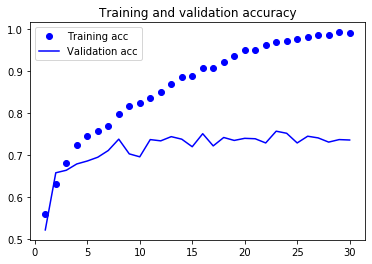

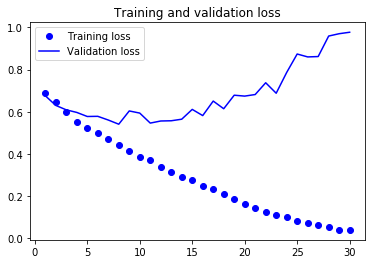

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

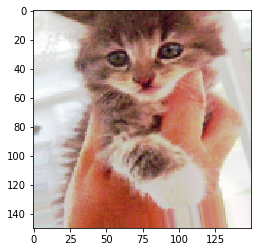

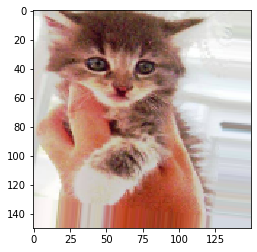

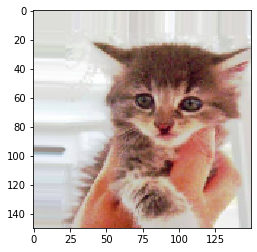

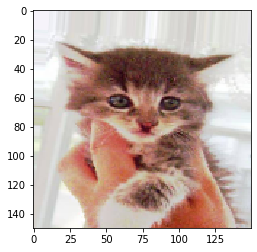

In [19]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size =(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.2,
                                   zoom_range=0.2,horizontal_flip=True,)

                                   
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
                    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - 65s 1s/step - loss: 0.6952 - acc: 0.5170 - val_loss: 0.6899 - val_acc: 0.5000
